In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC  # "Support vector classifier"
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs

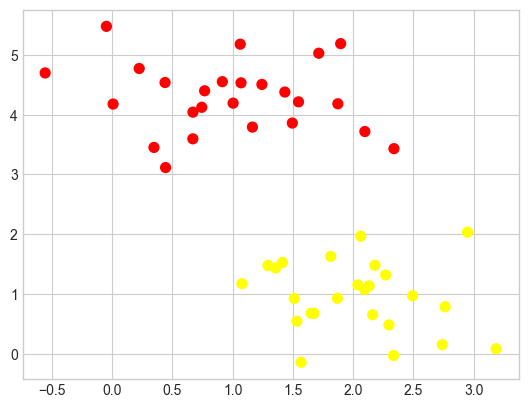

In [72]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

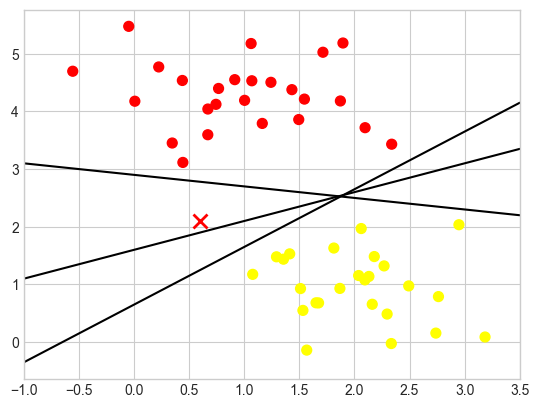

In [73]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


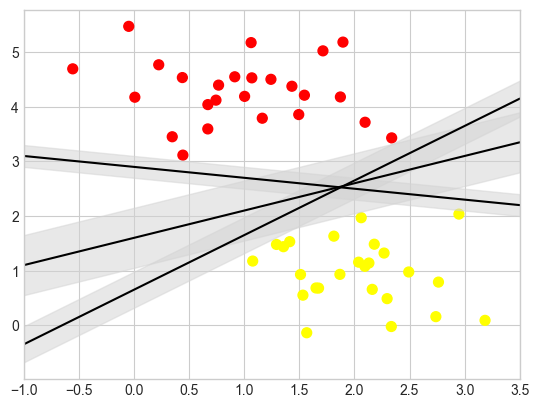

In [74]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


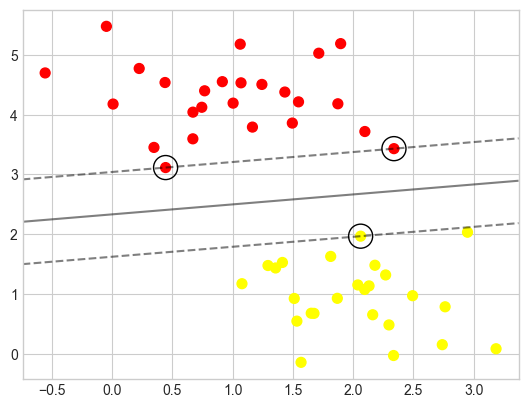

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [75]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_

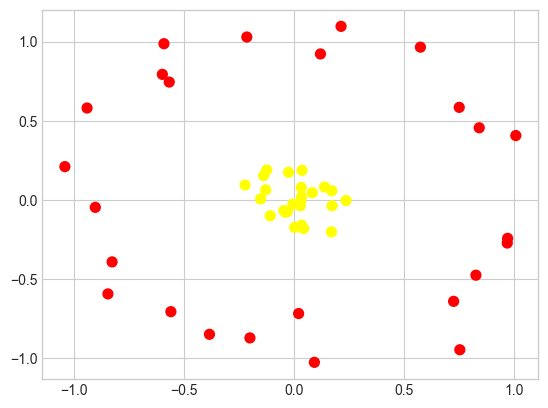

In [76]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

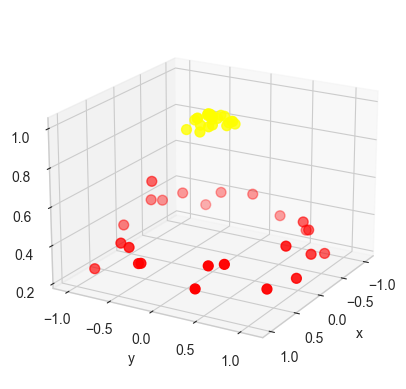

In [77]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');
plt.show()

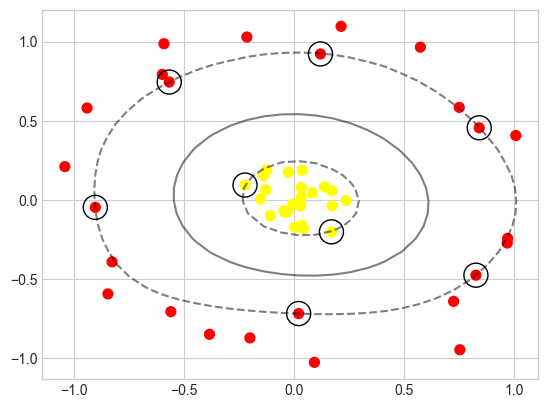

array([[ 0.84193599,  0.45537501],
       [ 0.82692624, -0.47567973],
       [-0.90333475, -0.04717904],
       [ 0.12010458,  0.92168931],
       [-0.56718631,  0.74412282],
       [ 0.0210121 , -0.71785849],
       [ 0.17010724, -0.20186005],
       [-0.22268717,  0.09367768]])

In [78]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

# Thuật toán tự viết

In [79]:
!pip install ucimlrepo

In [133]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)
# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

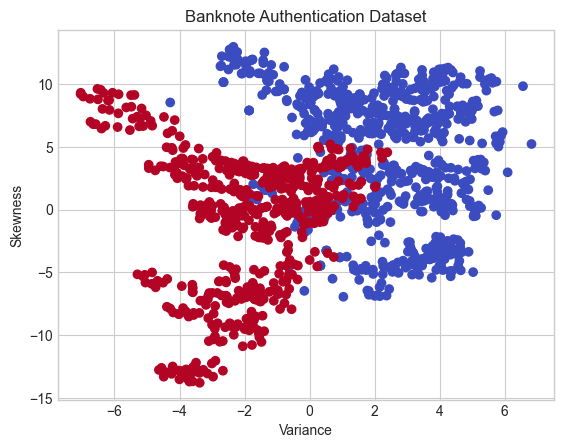

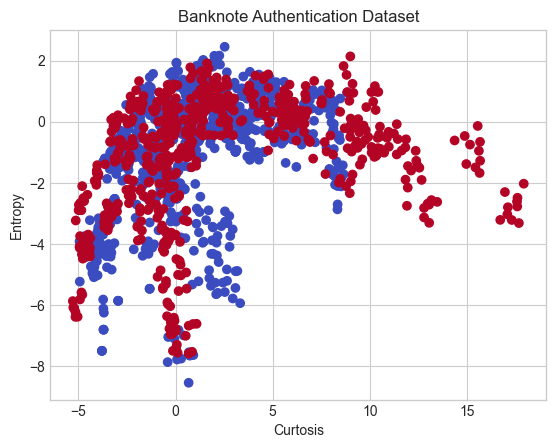

In [134]:
# Plot the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y['class'], cmap='coolwarm')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y['class'], cmap='coolwarm')
plt.xlabel('Curtosis')
plt.ylabel('Entropy')
plt.title('Banknote Authentication Dataset')
plt.show()

In [175]:
X = X.values
y = y['class'].values
print(X, y)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [191]:
Lagrange = np.zeros((X.shape[0], 1))
Lagrange[0:4] = np.random.rand(4, 1) * 10
print(Lagrange[0:10])

[[4.74625679]
 [7.62496486]
 [2.92418608]
 [6.75962198]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [192]:
W = np.array([])
for i in range(4):
    W = np.append(np.sum(Lagrange[i] * y * X[:, i]), W)
print(W)

[-5140.36031076  3831.98595168 -4621.34965041 -5409.54599872]


In [193]:
b = np.array([])
for i in range(4):
    yi = y[i]
    xi = X[i, :4]
    bi = yi - np.dot(W, xi)
    b = np.append(bi, b)
print(b)
bias = np.mean(b)
print(bias)

[-56704.29622607  39450.80866662 -27201.14558034 -29983.57239402]
-18609.551383450562


In [194]:
print("Siêu phẳng cần tìm là:")
print(f"{W[0]} * x1 + {W[1]} * x2 + {W[2]} * x3 + {W[3]} * x4 + {bias} = 0")

Siêu phẳng cần tìm là:
-5140.360310760406 * x1 + 3831.985951684453 * x2 + -4621.3496504143695 * x3 + -5409.545998719357 * x4 + -18609.551383450562 = 0


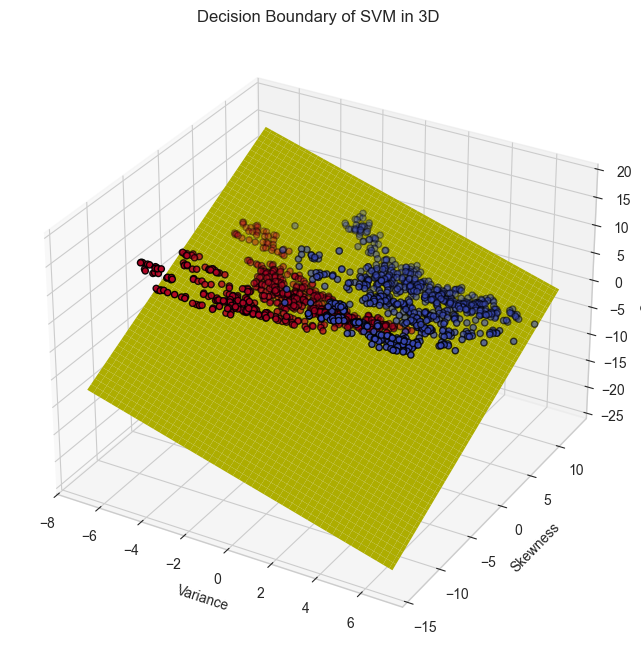

In [202]:
# Vẽ siêu phẳng trong không gian 3D (variance, skewness, curtosis)
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# plot the actual data in 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k')

# only meshgrid over the first two features
X1, X2 = np.meshgrid(x1, x2)

# decision boundary: W0*x1 + W1*x2 + W2*x3 + bias = 0  ⇒  x3 = -(bias + W0*X1 + W1*X2) / W2
Z = -(bias + W[0] * X1 + W[1] * X2) / W[2]

ax.plot_surface(X1, X2, Z, color='yellow')
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.set_zlabel('Curtosis')
ax.set_title('Decision Boundary of SVM in 3D')
plt.show()